In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sb
import pandas as pd

In [2]:
data = pd.read_csv("Iris.csv")

In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
# X, y = load_iris(return_X_y=True)
X = data.drop(columns=["Species"])
y = data["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(data, test_size=0.3, random_state=0)
nb_classifier = GaussianNB()
# nb_classifier = MultinomialNB()
y_pred = nb_classifier.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 45 points : 0


In [8]:
nb_classifier.score(X_test,y_test)

1.0

In [9]:
accuracy_score(y_test, y_pred)

1.0

In [10]:
nb_classifier.score(X_train,y_train)

0.9904761904761905

In [11]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

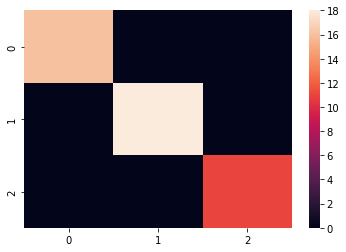

In [12]:
sb.heatmap(cm)

In [13]:
tp_setosa = cm[0][0]
tp_verginica = cm[1][1]
tp_versicolor = cm[2][2]

tp = tp_setosa+tp_verginica+tp_versicolor

In [14]:
tn_setosa = cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2]
tn_verginica = cm[0][0]+cm[0][2]+cm[2][0]+cm[2][2]
tn_versicolor = cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]

tn = tn_setosa+tn_verginica+tn_versicolor

In [15]:
fp_setosa = cm[1][0]+cm[2][0]
fp_verginica = cm[0][1]+cm[2][1]
fp_versicolor = cm[0][2]+cm[1][2]

fp = fp_setosa+fp_verginica+fp_versicolor

In [16]:
fn_setosa = cm[0][1]+cm[0][2]
fn_verginica = cm[1][0]+cm[1][2]
fn_versicolor = cm[2][0]+cm[2][1]

fn = fn_setosa+fn_verginica+fn_versicolor

In [17]:
print("TP : ",tp)
print("TN : ",tn)
print("FP : ",fp)
print("FN : ",fn)

print("Precision  : ",tp/(tp+fp)*100,"%")
print("Recall     : ",tp/(tp+fn)*100,"%")
print("Error Rate : ",(fn+fp)/(fn+fp+tn+tp)*100,"%")
print("Accuracy   : ",(tp+tn)/(tp+tn+fp+fn)*100,"%")

TP :  45
TN :  90
FP :  0
FN :  0
Precision  :  100.0 %
Recall     :  100.0 %
Error Rate :  0.0 %
Accuracy   :  100.0 %
